在本次实验中,已知的输入是一个矩阵,其中最后一列的-1、1表示二分类的类别,其它列表示特征(二维理解就是横纵坐标).

输入上传到whetherLinearSeparable方法中，features中存放的是特征矩阵，labels存放的是标签矩阵.

对特征进行标准化处理后,创建以linear作为内核的svm支持向量机模型,使用交大的C值增加模型并训练模型.

计算出分割线（二维下,其它维度特征输入下，如输入N维，应该是产成N-1维的分割），predicted中存放的是依据分割平面的预测结果.

在最后，判断是否是线性可分的时候，我产生了一个疑问：线性可分的条件是什么？

根据题目给出的示例，线性可分的条件是：存在一个超平面可以将数据集分割成两部分,并且两部分数据的标签不同.但是在我的本科学习中,学习到SVM分割只是找到一个超平面,数据集分割成两部分,且两部分的距离最大.这里我根据题目判断,超平面分割后的区域标签是否存在不同.如果完全分割,则同一区域不存在不同标签,返回1,否则，返回-1.

返回值是1或-1，表示输入数据是否线性可分.

针对两个输入示例,绘制了二维平面的决策边界,并判断是否线性可分.
























示例1：如图,

![sample1.png](./sample1.png).

在1000分辨率下，绘制出的决策边界上，不存在不同标签的区域，所以返回1.



























示例2：如图,

![sample2.png](./sample2.png).

在1000分辨率下，绘制出的决策边界上，存在不同标签的区域，所以返回-1.



Y = 1


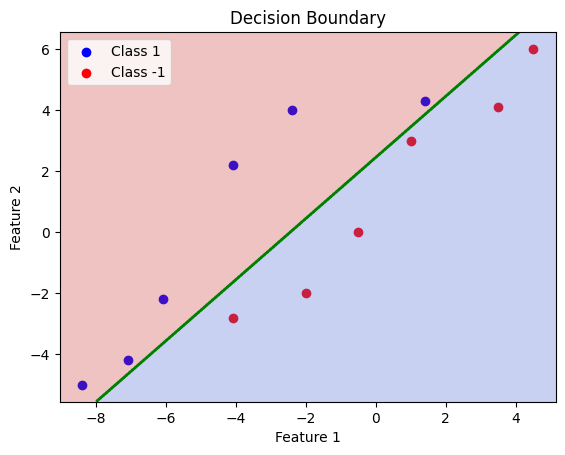

Y = -1


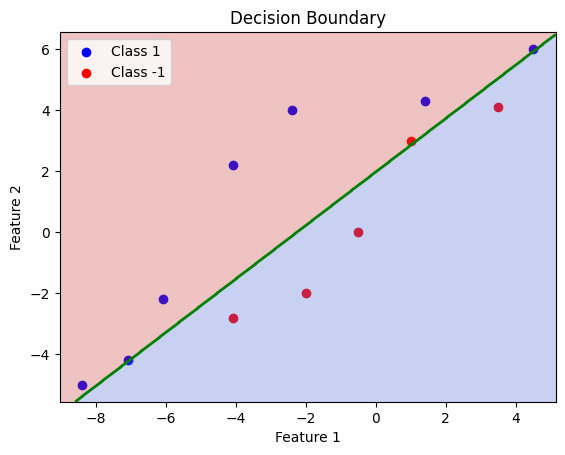

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


def whetherLinearSeparable(X):
    features = X[:, :-1]
    labels = X[:, -1]

    # 标准化特征
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # 创建支持向量机模型
    model = SVC(kernel='linear', C=1e10)  # 使用大C值以增加模型对错误分类的惩罚
    model.fit(features_scaled, labels)

    # 预测结果
    predictions = model.predict(features_scaled)

    # 判断是否完全分离
    if np.all(predictions == labels):  # 如果所有预测与标签一致，则线性可分
        return 1
    else:
        return -1

def plot_decision_boundary(X, model, filename):
    features = X[:, :-1]
    labels = X[:, -1]

    # 绘制散点图
    plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1], color='b', label='Class 1')
    plt.scatter(features[labels == -1][:, 0], features[labels == -1][:, 1], color='r', label='Class -1')

    # 创建更细的网格
    xlim = plt.xlim()
    ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000), np.linspace(ylim[0], ylim[1], 1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')  # 更清晰的边界
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

        # 保存图像
    plt.savefig(filename)  # 保存图像
    plt.show()  # 显示图像

# 输入数据
X =np.array([[-0.5,-0,-1],[3.5,4.1,-1],[4.5,6,-1],[-2,-2.0,-1],[-4.1,-2.8,-1],[1,3,-1],[-7.1,-4.2,1],

[-6.1,-2.2,1],[-4.1, 2.2,1],[1.4,4.3,1],[-2.4,4.0,1],[-8.4,-5,1]])



# 检查线性可分性
is_separable = whetherLinearSeparable(X)

# 输出结果
print(f"Y = {is_separable}")  # 或者使用其他方法

# 绘制决策边界
model = SVC(kernel='linear', C=1e10)
model.fit(X[:, :-1], X[:, -1])
plot_decision_boundary(X, model,'sample1.png')

X =np.array([[-0.5,-0,-1],[3.5,4.1,-1],[4.5,6,1],[-2,-2.0,-1],[-4.1,-2.8,-1],[1,3,-1],[-7.1,-4.2,1],

[-6.1,-2.2,1],[-4.1, 2.2, 1],[1.4,4.3,1],[-2.4,4.0,1],[-8.4,-5,1]])



# 检查线性可分性
is_separable = whetherLinearSeparable(X)

# 输出结果
print(f"Y = {is_separable}")  # 或者使用其他方法

# 绘制决策边界
model = SVC(kernel='linear', C=1e10)
model.fit(X[:, :-1], X[:, -1])
plot_decision_boundary(X, model, 'sample2.png')

